In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
#HUE_consolidated_df = pd.read_csv('./Intermediate Datasets/HUE.csv')
RAE_house1_df = pd.read_csv('./Intermediate Datasets/RAE_house1.csv')
RAE_house2_df = pd.read_csv('./Intermediate Datasets/RAE_house2.csv')
AMPDS_df = pd.read_csv('./Intermediate Datasets/AMPDS.csv')
HUE_12_df = pd.read_csv('HUE/Residential_12.csv')

In [3]:
AMPDS_df

,TS,Electronics Workbench Energy,Network Equipment Energy,Home Office Energy,Total Energy
0,2012-04-01 08:00:00,0.000000,0.018556,0.008088,0.954902
1,2012-04-01 09:00:00,0.000000,0.019031,0.008088,1.195174
2,2012-04-01 10:00:00,0.000000,0.018556,0.009040,0.927307
3,2012-04-01 11:00:00,0.000000,0.019031,0.008564,1.546304
4,2012-04-01 12:00:00,0.000000,0.018556,0.009040,1.601020
...,...,...,...,...,...
8227,2013-04-01 02:00:00,0.012370,0.019031,0.015225,0.434393
8228,2013-04-01 03:00:00,0.012370,0.019031,0.015701,0.590450
8229,2013-04-01 04:00:00,0.012846,0.019507,0.016653,0.435820
8230,2013-04-01 05:00:00,0.012370,0.019031,0.015225,0.795514


### Electronics Workbench

In [4]:
workbench_df = AMPDS_df[['Total Energy', 'Electronics Workbench Energy']].copy()
workbench_df

,Total Energy,Electronics Workbench Energy
0,0.954902,0.000000
1,1.195174,0.000000
2,0.927307,0.000000
3,1.546304,0.000000
4,1.601020,0.000000
...,...,...
8227,0.434393,0.012370
8228,0.590450,0.012370
8229,0.435820,0.012846
8230,0.795514,0.012370


In [5]:
workbench_df.isna().sum()

Total Energy                    0
Electronics Workbench Energy    0
dtype: int64

In [6]:
workbench_train_df = workbench_df.sample(frac=0.8, random_state=0)
workbench_test_df = workbench_df.drop(workbench_train_df.index)

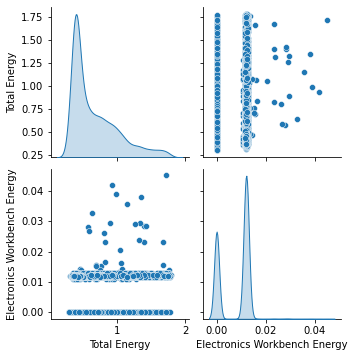

In [7]:
sns.pairplot(workbench_train_df, diag_kind='kde')

In [8]:
workbench_train_features = workbench_train_df.copy()
workbench_test_features = workbench_test_df.copy()

workbench_train_labels = workbench_train_features.pop('Electronics Workbench Energy')
workbench_test_labels = workbench_test_features.pop('Electronics Workbench Energy')

In [9]:
workbench_train_df.describe().transpose()[['mean', 'std']]

,mean,std
Total Energy,0.671554,0.340547
Electronics Workbench Energy,0.007772,0.005952


In [10]:
def plot_horsepower(x,y):
  plt.scatter(workbench_test_features, workbench_test_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Total Energy')
  plt.ylabel('Electronics Workbench Energy')
  plt.legend()

In [11]:
workbench_reg = LinearRegression().fit(workbench_train_features, workbench_train_labels)

In [12]:
workbench_reg.score(workbench_test_features, workbench_test_labels)

0.03221507684814762

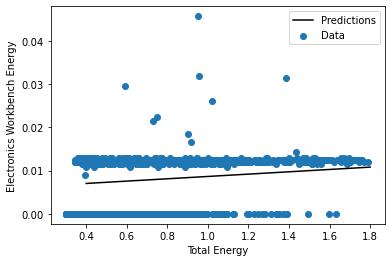

In [13]:
x = np.linspace(0.4, 1.8, 251)
y = workbench_reg.predict(x.reshape(-1, 1))
plot_horsepower(x,y)

In [14]:
HUE_12_df.dropna(inplace = True)
HUE_12_df.isna().sum()

date          0
hour          0
energy_kWh    0
dtype: int64

In [15]:
HUE_12_total_energy = np.array(HUE_12_df['energy_kWh'])
HUE_12_df['electronics workbench energy'] = workbench_reg.predict(HUE_12_total_energy.reshape(-1,1))

In [16]:
HUE_12_df

,date,hour,energy_kWh,electronics workbench energy
0,2015-02-21,0,0.29,0.006745
1,2015-02-21,1,0.28,0.006718
2,2015-02-21,2,0.30,0.006772
3,2015-02-21,3,0.24,0.006610
4,2015-02-21,4,0.24,0.006610
...,...,...,...,...
26299,2018-02-20,19,1.14,0.009034
26300,2018-02-20,20,0.29,0.006745
26301,2018-02-20,21,0.27,0.006691
26302,2018-02-20,22,0.25,0.006637


### Network Energy

In [17]:
AMPDS_df.columns

Index(['TS', 'Electronics Workbench Energy', 'Network Equipment Energy',
       'Home Office Energy', 'Total Energy'],
      dtype='object')

In [18]:
network_df = AMPDS_df[['Total Energy', 'Network Equipment Energy']].copy()
network_df

,Total Energy,Network Equipment Energy
0,0.954902,0.018556
1,1.195174,0.019031
2,0.927307,0.018556
3,1.546304,0.019031
4,1.601020,0.018556
...,...,...
8227,0.434393,0.019031
8228,0.590450,0.019031
8229,0.435820,0.019507
8230,0.795514,0.019031


In [19]:
network_df.isna().sum()

Total Energy                0
Network Equipment Energy    0
dtype: int64

In [20]:
network_train_df = network_df.sample(frac=0.8, random_state=0)
network_test_df = network_df.drop(network_train_df.index)

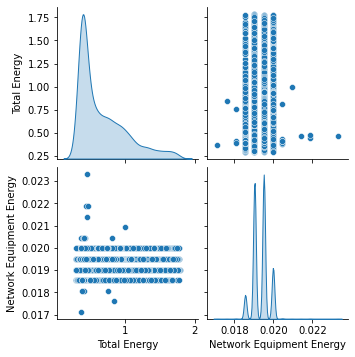

In [21]:
sns.pairplot(network_train_df, diag_kind='kde')

In [22]:
network_train_features = network_train_df.copy()
network_test_features = network_test_df.copy()
network_train_labels = network_train_features.pop('Network Equipment Energy')
network_test_labels = network_test_features.pop('Network Equipment Energy')

In [23]:
network_train_df.describe().transpose()[['mean', 'std']]

,mean,std
Total Energy,0.671554,0.340547
Network Equipment Energy,0.019330,0.000396


In [24]:
def plot_network(x,y):
  plt.scatter(network_test_features, network_test_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Total Energy')
  plt.ylabel('Network Energy')
  plt.legend()

In [25]:
network_reg = LinearRegression().fit(network_train_features, network_train_labels)
network_reg.score(network_test_features, network_test_labels)

-0.0017852784845797665

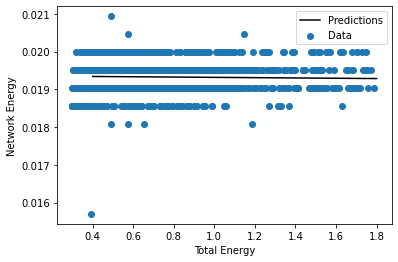

In [26]:
x = np.linspace(0.4, 1.8, 251)
y = network_reg.predict(x.reshape(-1, 1))
plot_network(x,y)

In [27]:
HUE_12_total_energy = np.array(HUE_12_df['energy_kWh'])
HUE_12_df['network energy'] = network_reg.predict(HUE_12_total_energy.reshape(-1,1))

In [28]:
HUE_12_df

,date,hour,energy_kWh,electronics workbench energy,network energy
0,2015-02-21,0,0.29,0.006745,0.019345
1,2015-02-21,1,0.28,0.006718,0.019345
2,2015-02-21,2,0.30,0.006772,0.019344
3,2015-02-21,3,0.24,0.006610,0.019347
4,2015-02-21,4,0.24,0.006610,0.019347
...,...,...,...,...,...
26299,2018-02-20,19,1.14,0.009034,0.019311
26300,2018-02-20,20,0.29,0.006745,0.019345
26301,2018-02-20,21,0.27,0.006691,0.019345
26302,2018-02-20,22,0.25,0.006637,0.019346


In [29]:
AMPDS_df.columns

Index(['TS', 'Electronics Workbench Energy', 'Network Equipment Energy',
       'Home Office Energy', 'Total Energy'],
      dtype='object')

### Home Office Energy

In [30]:
homeoffice_df = AMPDS_df[['Total Energy', 'Home Office Energy']].copy()
homeoffice_df

,Total Energy,Home Office Energy
0,0.954902,0.008088
1,1.195174,0.008088
2,0.927307,0.009040
3,1.546304,0.008564
4,1.601020,0.009040
...,...,...
8227,0.434393,0.015225
8228,0.590450,0.015701
8229,0.435820,0.016653
8230,0.795514,0.015225


In [31]:
homeoffice_df.isna().sum()

Total Energy          0
Home Office Energy    0
dtype: int64

In [32]:
homeoffice_train_df = homeoffice_df.sample(frac=0.8, random_state=0)
homeoffice_test_df = homeoffice_df.drop(workbench_train_df.index)

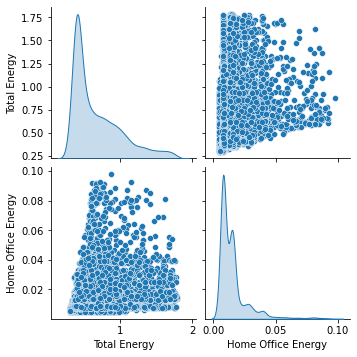

In [33]:
sns.pairplot(homeoffice_train_df, diag_kind='kde')

In [34]:
homeoffice_train_df.columns

Index(['Total Energy', 'Home Office Energy'], dtype='object')

In [35]:
homeoffice_train_features = homeoffice_train_df.copy()
homeoffice_test_features = homeoffice_test_df.copy()

homeoffice_train_labels = homeoffice_train_features.pop('Home Office Energy')
homeoffice_test_labels = homeoffice_test_features.pop('Home Office Energy')

In [36]:
homeoffice_train_df.describe().transpose()[['mean', 'std']]

,mean,std
Total Energy,0.671554,0.340547
Home Office Energy,0.015512,0.012425


In [37]:
def plot_homeoffice(x,y):
  plt.scatter(homeoffice_test_features, homeoffice_test_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Total Energy')
  plt.ylabel('AMPDS Home Office Energy')
  plt.legend()

In [38]:
homeoffice_reg = LinearRegression().fit(homeoffice_train_features, homeoffice_train_labels)
homeoffice_reg.score(homeoffice_train_features, homeoffice_train_labels)

0.04824582522479193

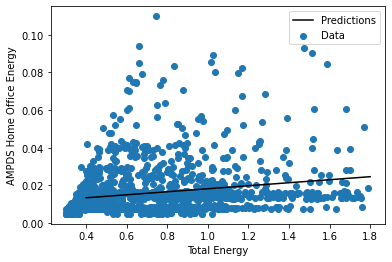

In [39]:
x = np.linspace(0.4, 1.8, 251)
y = homeoffice_reg.predict(x.reshape(-1, 1))
plot_homeoffice(x,y)

In [40]:
HUE_12_total_energy = np.array(HUE_12_df['energy_kWh'])
HUE_12_df['Homeoffice Energy'] = homeoffice_reg.predict(HUE_12_total_energy.reshape(-1,1))

In [41]:
HUE_12_df

,date,hour,energy_kWh,electronics workbench energy,network energy,Homeoffice Energy
0,2015-02-21,0,0.29,0.006745,0.019345,0.012454
1,2015-02-21,1,0.28,0.006718,0.019345,0.012374
2,2015-02-21,2,0.30,0.006772,0.019344,0.012534
3,2015-02-21,3,0.24,0.006610,0.019347,0.012054
4,2015-02-21,4,0.24,0.006610,0.019347,0.012054
...,...,...,...,...,...,...
26299,2018-02-20,19,1.14,0.009034,0.019311,0.019266
26300,2018-02-20,20,0.29,0.006745,0.019345,0.012454
26301,2018-02-20,21,0.27,0.006691,0.019345,0.012294
26302,2018-02-20,22,0.25,0.006637,0.019346,0.012134


### RAE house 1

In [42]:
RAE_house1_df = RAE_house1_df[['Home Office Energy', 'Total Energy']]
RAE_house1_df

,Home Office Energy,Total Energy
0,0.001578,0.010140
1,0.002233,0.012823
2,0.002901,0.015468
3,0.003573,0.018212
4,0.004247,0.021452
...,...,...
211,0.154690,1.222733
212,0.155409,1.231294
213,0.156112,1.240656
214,0.156790,1.245218


In [43]:
RAE_house1_df.isna().sum()

Home Office Energy    0
Total Energy          0
dtype: int64

In [44]:
house1_train_df = RAE_house1_df.sample(frac=0.8, random_state=0)
house1_test_df = RAE_house1_df.drop(house1_train_df.index)

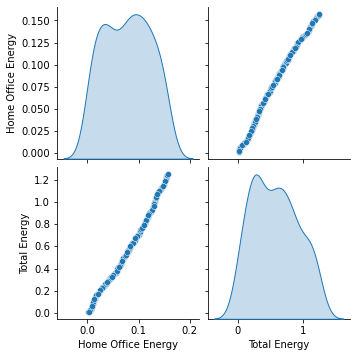

In [45]:
sns.pairplot(house1_train_df , diag_kind='kde')

In [46]:
house1_train_features = house1_train_df.copy()
house1_test_features = house1_test_df.copy()

house1_train_labels = house1_train_features.pop('Home Office Energy')
house1_test_labels = house1_test_features.pop('Home Office Energy')

In [47]:
house1_train_df.describe().transpose()[['mean', 'std']]

,mean,std
Home Office Energy,0.077420,0.045508
Total Energy,0.570971,0.349011


In [48]:
def plot_house1(x,y):
  plt.scatter(house1_test_features, house1_test_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Total Energy')
  plt.ylabel('RAE Home Office Energy')
  plt.legend()

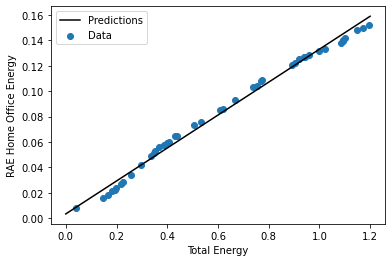

In [49]:
house1_reg = LinearRegression().fit(house1_train_features, house1_train_labels)
x = np.linspace(0, 1.2, 251)
y = house1_reg.predict(x.reshape(-1, 1))
plot_house1(x,y)

In [50]:
HUE_12_total_energy = np.array(HUE_12_df['energy_kWh'])
HUE_12_df['Home Office Energy 2'] = house1_reg.predict(HUE_12_total_energy.reshape(-1,1))

In [51]:
HUE_12_df

,date,hour,energy_kWh,electronics workbench energy,network energy,Homeoffice Energy,Home Office Energy 2
0,2015-02-21,0,0.29,0.006745,0.019345,0.012454,0.040928
1,2015-02-21,1,0.28,0.006718,0.019345,0.012374,0.039630
2,2015-02-21,2,0.30,0.006772,0.019344,0.012534,0.042227
3,2015-02-21,3,0.24,0.006610,0.019347,0.012054,0.034434
4,2015-02-21,4,0.24,0.006610,0.019347,0.012054,0.034434
...,...,...,...,...,...,...,...
26299,2018-02-20,19,1.14,0.009034,0.019311,0.019266,0.151325
26300,2018-02-20,20,0.29,0.006745,0.019345,0.012454,0.040928
26301,2018-02-20,21,0.27,0.006691,0.019345,0.012294,0.038331
26302,2018-02-20,22,0.25,0.006637,0.019346,0.012134,0.035733


### RAE house 2

In [52]:
RAE_house2_df

,TS,Mobile Phone Charger Energy,Total Energy
0,2017-09-13 07:00:00,0.000021,0.042086
1,2017-09-13 08:00:00,0.000021,0.042438
2,2017-09-13 09:00:00,0.000022,0.042794
3,2017-09-13 10:00:00,0.000023,0.043140
4,2017-09-13 11:00:00,0.000023,0.043531
...,...,...,...
1404,2017-11-10 19:00:00,0.000471,1.180865
1405,2017-11-10 20:00:00,0.000471,1.181522
1406,2017-11-10 21:00:00,0.000471,1.182140
1407,2017-11-10 22:00:00,0.000471,1.182776


In [53]:
house2_df = RAE_house2_df[['Total Energy', 'Mobile Phone Charger Energy']].copy()
house2_df

,Total Energy,Mobile Phone Charger Energy
0,0.042086,0.000021
1,0.042438,0.000021
2,0.042794,0.000022
3,0.043140,0.000023
4,0.043531,0.000023
...,...,...
1404,1.180865,0.000471
1405,1.181522,0.000471
1406,1.182140,0.000471
1407,1.182776,0.000471


In [54]:
house2_df.isna().sum()

Total Energy                   0
Mobile Phone Charger Energy    0
dtype: int64

In [55]:
house2_train_df = house2_df.sample(frac=0.8, random_state=0)
house2_test_df = house2_df.drop(house2_train_df.index)

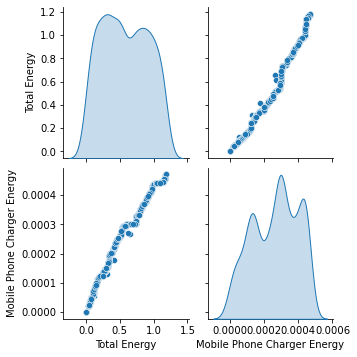

In [56]:
sns.pairplot(house2_train_df, diag_kind='kde')

In [57]:
house2_train_features = house2_train_df.copy()
house2_test_features = house2_test_df.copy()

house2_train_labels = house2_train_features.pop('Mobile Phone Charger Energy')
house2_test_labels = house2_test_features.pop('Mobile Phone Charger Energy')

In [58]:
house2_train_df.describe().transpose()[['mean', 'std']]

,mean,std
Total Energy,0.575376,0.338749
Mobile Phone Charger Energy,0.000263,0.000132


In [59]:
def plot_house2(x,y):
  plt.scatter(house2_test_features, house2_test_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Total Energy')
  plt.ylabel('Mobile Phone Charger Energy')
  plt.legend()

In [60]:
house2_reg = LinearRegression().fit(house2_train_features, house2_train_labels)

In [61]:
house2_reg.score(house2_test_features, house2_test_labels)

0.9800899578522355

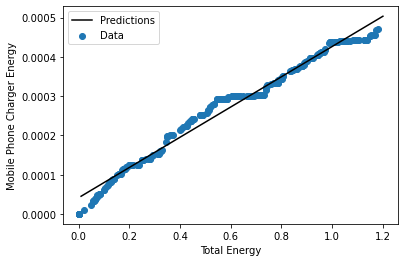

In [62]:
x = np.linspace(0.01, 1.2, 251)
y = house2_reg.predict(x.reshape(-1, 1))
plot_house2(x,y)

In [63]:
HUE_12_total_energy = np.array(HUE_12_df['energy_kWh'])
HUE_12_df['Mobile Phone Charger Energy'] = house2_reg.predict(HUE_12_total_energy.reshape(-1,1))

In [64]:
HUE_12_df

,date,hour,energy_kWh,electronics workbench energy,network energy,Homeoffice Energy,Home Office Energy 2,Mobile Phone Charger Energy
0,2015-02-21,0,0.29,0.006745,0.019345,0.012454,0.040928,0.000153
1,2015-02-21,1,0.28,0.006718,0.019345,0.012374,0.039630,0.000149
2,2015-02-21,2,0.30,0.006772,0.019344,0.012534,0.042227,0.000157
3,2015-02-21,3,0.24,0.006610,0.019347,0.012054,0.034434,0.000134
4,2015-02-21,4,0.24,0.006610,0.019347,0.012054,0.034434,0.000134
...,...,...,...,...,...,...,...,...
26299,2018-02-20,19,1.14,0.009034,0.019311,0.019266,0.151325,0.000480
26300,2018-02-20,20,0.29,0.006745,0.019345,0.012454,0.040928,0.000153
26301,2018-02-20,21,0.27,0.006691,0.019345,0.012294,0.038331,0.000145
26302,2018-02-20,22,0.25,0.006637,0.019346,0.012134,0.035733,0.000137


### Consolidated regression models

In [65]:
# Sample code
# HUE_12_total_energy = np.array(HUE_12_df['energy_kWh'])
# HUE_12_df['electronics workbench energy'] = workbench_reg.predict(HUE_12_total_energy.reshape(-1,1))

In [66]:
# Models 
# Electronics Workbench : workbench_reg
# Network Equipment Energy: network_reg
# Home Office Energy: homeoffice_reg
# RAE Home Office Energy: house1_reg
# RAE Mobile Phone Charger Energy: house2_reg

In [67]:
HUE_first_df = pd.read_csv('./Intermediate Datasets/HUE_first_df.csv')
HUE_second_df = pd.read_csv('./Intermediate Datasets/HUE_second_df.csv')
HUE_third_df = pd.read_csv('./Intermediate Datasets/HUE_third_df.csv')
HUE_fourth_df = pd.read_csv('./Intermediate Datasets/HUE_fourth_df.csv')

In [68]:
HUE_datasets = [HUE_first_df,HUE_second_df,HUE_third_df,HUE_fourth_df]

In [69]:
HUE_df = pd.concat(HUE_datasets)
HUE_df.dropna(inplace = True)

In [70]:
HUE_total_energy = np.array(HUE_df['energy_kWh'])
HUE_df['electronics workbench energy'] = workbench_reg.predict(HUE_total_energy.reshape(-1,1))
HUE_df['network equipment energy'] = network_reg.predict(HUE_total_energy.reshape(-1,1))
HUE_df['home office energy'] = homeoffice_reg.predict(HUE_total_energy.reshape(-1,1))
HUE_df['RAE home office energy'] = house1_reg.predict(HUE_total_energy.reshape(-1,1))
HUE_df['RAE Mobile Phone Charger Energy'] = house2_reg.predict(HUE_total_energy.reshape(-1,1))

In [71]:
HUE_df['timestamp'] = pd.to_datetime(HUE_df['timestamp']) 

In [72]:
# Ratio of smart devices in total energy
HUE_df.loc[HUE_df['timestamp'] > pd.Timestamp('2020-03-11'), ['electronics workbench energy', 'network equipment energy',
       'home office energy', 'RAE home office energy',
       'RAE Mobile Phone Charger Energy']].iloc[0].sum()/float(HUE_df.loc[HUE_df['timestamp'] > pd.Timestamp('2020-03-11'), ['energy_kWh']].iloc[0])

0.1709733321759676

In [73]:
# https://en.wikipedia.org/wiki/Timeline_of_the_COVID-19_pandemic_in_Canada#February
# March 11 is when COVID really started in Canada

HUE_df.loc[HUE_df['timestamp'] > pd.Timestamp('2020-03-11'),  ['electronics workbench energy', 'network equipment energy',
       'home office energy', 'RAE home office energy',
       'RAE Mobile Phone Charger Energy']] = HUE_df.loc[HUE_df['timestamp'] > pd.Timestamp('2020-03-11'),  ['electronics workbench energy', 'network equipment energy',
       'home office energy', 'RAE home office energy',
       'RAE Mobile Phone Charger Energy']].applymap(lambda x: x * 2)


HUE_df.loc[HUE_df['timestamp'] > pd.Timestamp('2020-03-11'),  ['energy_kWh']] = HUE_df.loc[HUE_df['timestamp'] > pd.Timestamp('2020-03-11'),  ['energy_kWh']].applymap(lambda x: x * 1.17)

HUE_df.loc[HUE_df['timestamp'] > pd.Timestamp('2020-03-11')]
# df1.loc[df1['stream'] == 2, cols ] = df1 / 2
# print df1

,timestamp,energy_kWh,House Number,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy
39961,2020-03-11 01:00:00,1.5093,23,0.018875,0.038610,0.040937,0.341613,0.001077
39962,2020-03-11 02:00:00,3.1707,23,0.026523,0.038498,0.063697,0.710466,0.002171
39963,2020-03-11 03:00:00,0.6435,23,0.014890,0.038669,0.029076,0.149393,0.000506
39964,2020-03-11 04:00:00,0.9477,23,0.016290,0.038648,0.033243,0.216930,0.000707
39965,2020-03-11 05:00:00,0.9009,23,0.016074,0.038651,0.032602,0.206540,0.000676
...,...,...,...,...,...,...,...,...
123761,2020-05-19 19:00:00,3.5802,28,0.028408,0.038470,0.069307,0.801381,0.002441
123762,2020-05-19 20:00:00,3.4398,28,0.027762,0.038479,0.067384,0.770210,0.002348
123763,2020-05-19 21:00:00,2.3049,28,0.022537,0.038556,0.051836,0.518247,0.001601
123764,2020-05-19 22:00:00,2.4921,28,0.023399,0.038544,0.054401,0.559808,0.001724


In [74]:
# Earlier values for reference
# Smart device features have been multiplied by c=2 and total energy has been multiplied by c=1.17
# 39961  2020-03-11 01:00:00	1.29	23	0.009437	0.019305	0.020468	0.170806	0.000538
# 123765 2020-05-19 23:00:00	1.01	28	0.008683	0.019316	0.018224	0.134440	0.000430


In [75]:
HUE_df

,timestamp,energy_kWh,House Number,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy
0,2012-06-01 01:00:00,1.0110,1,0.008686,0.019316,0.018232,0.134570,0.000431
1,2012-06-01 02:00:00,0.4510,1,0.007178,0.019338,0.013745,0.061839,0.000215
2,2012-06-01 03:00:00,0.5050,1,0.007324,0.019336,0.014177,0.068852,0.000236
3,2012-06-01 04:00:00,0.4410,1,0.007151,0.019339,0.013664,0.060540,0.000211
4,2012-06-01 05:00:00,0.4680,1,0.007224,0.019338,0.013881,0.064047,0.000221
...,...,...,...,...,...,...,...,...
123761,2020-05-19 19:00:00,3.5802,28,0.028408,0.038470,0.069307,0.801381,0.002441
123762,2020-05-19 20:00:00,3.4398,28,0.027762,0.038479,0.067384,0.770210,0.002348
123763,2020-05-19 21:00:00,2.3049,28,0.022537,0.038556,0.051836,0.518247,0.001601
123764,2020-05-19 22:00:00,2.4921,28,0.023399,0.038544,0.054401,0.559808,0.001724


In [76]:
HUE_df.to_csv('Final Datasets/energy_consumption.csv')